In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.impute as SimpleImputer
import os

In [2]:
os.getcwd()

'C:\\Users\\harap\\HSAI\\exam3'

In [3]:
os.chdir(r'C:\Users\harap\Downloads')

In [4]:
df_train = pd.read_csv('train_LZdllcl.csv')
df_test = pd.read_csv('test_2umaH9m.csv')

In [5]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


C:\Users\harap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


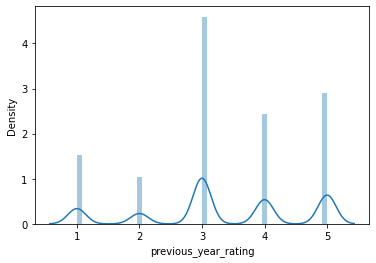

In [6]:
sns.distplot(df_train['previous_year_rating'])
plt.show()

In [7]:
corr = df_train.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


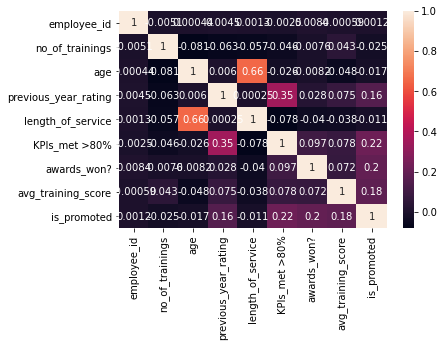

In [8]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

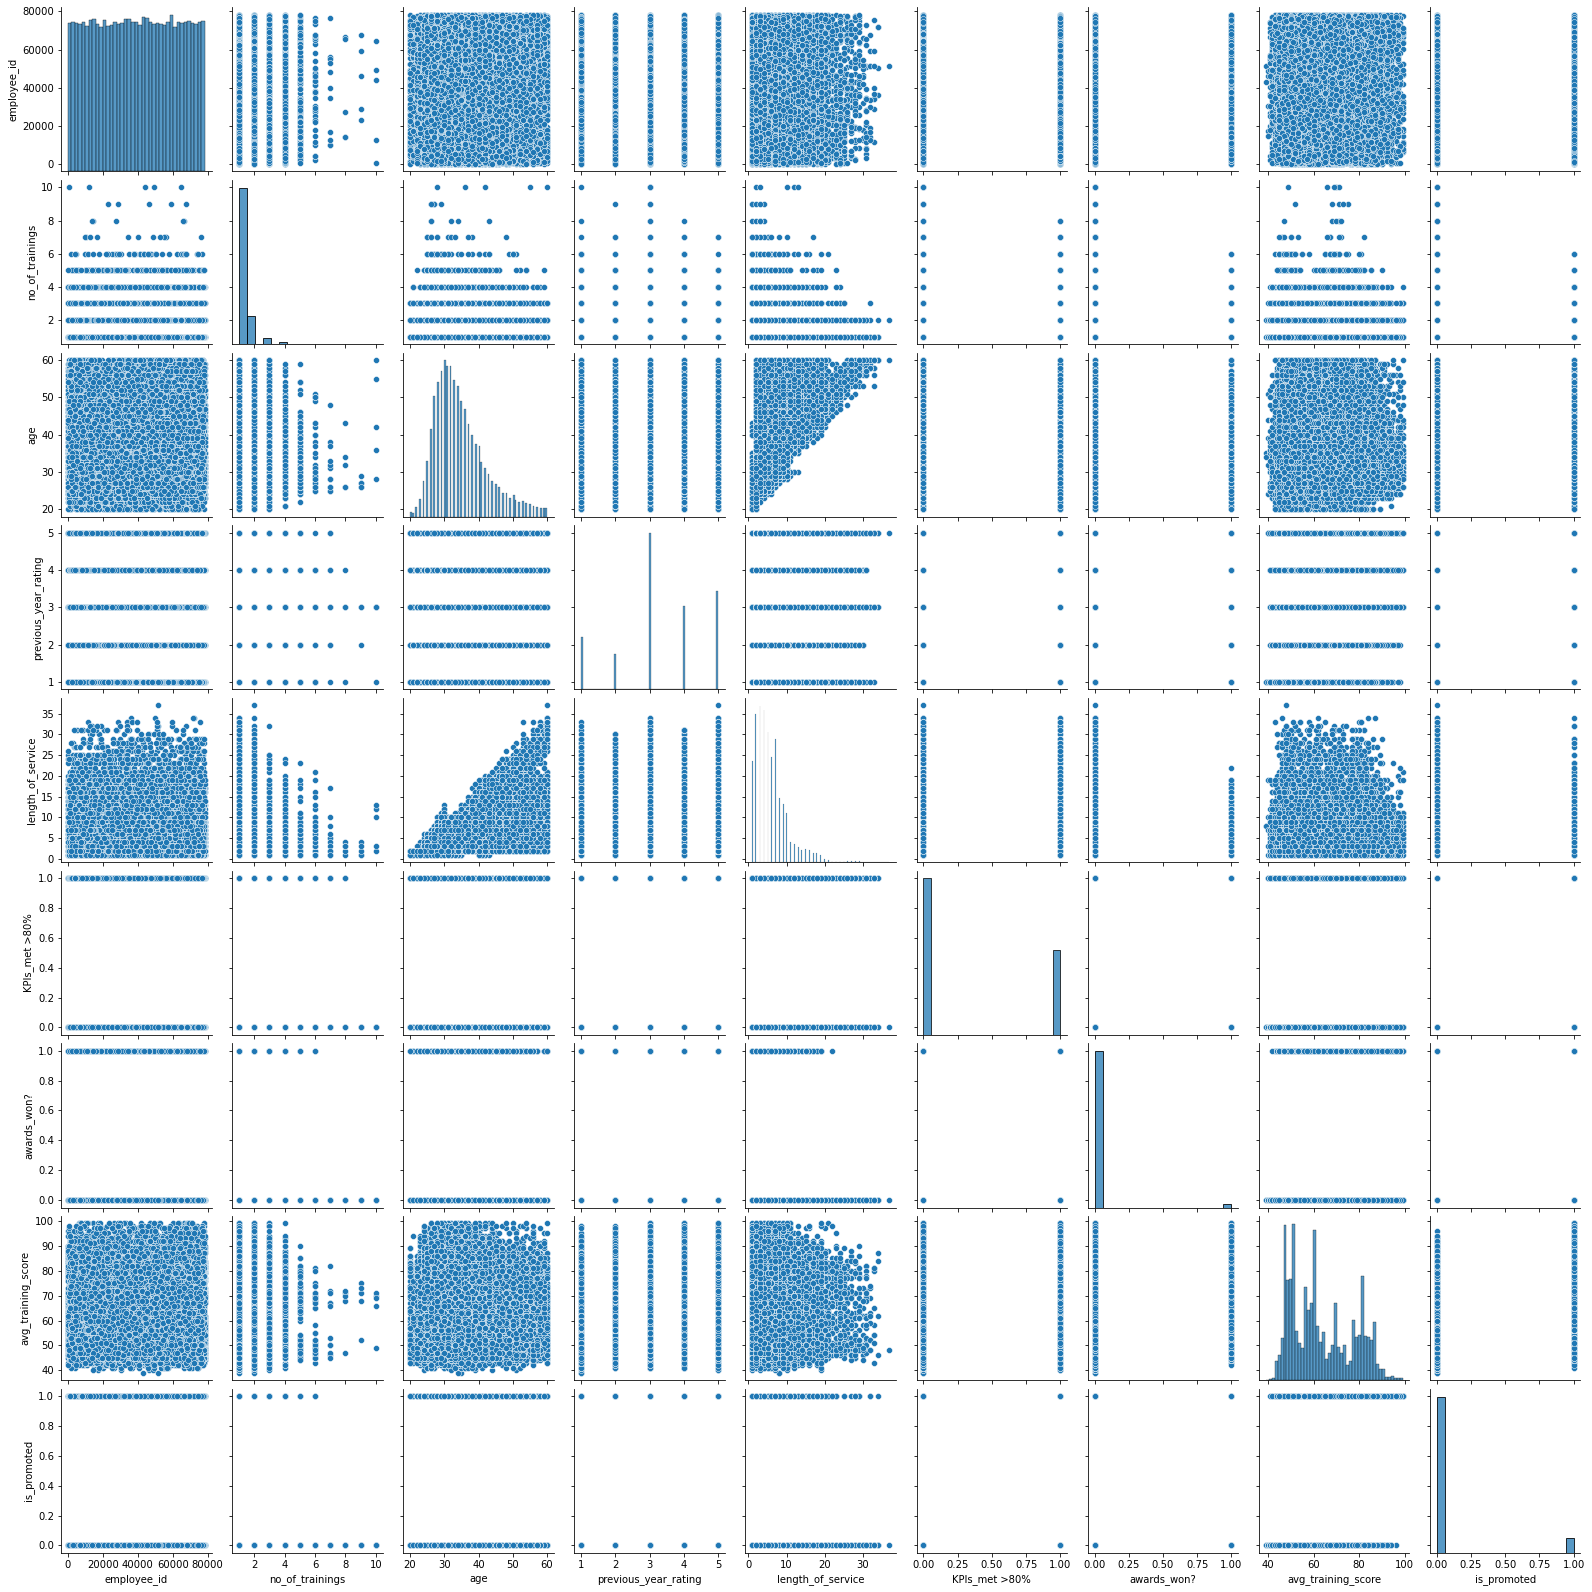

In [9]:
sns.pairplot(df_train)
plt.show()

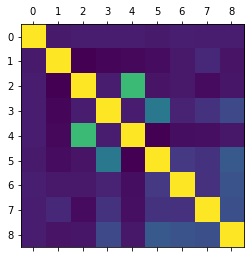

In [10]:
plt.matshow(df_train.corr())
plt.show()

In [11]:
df_train.is_promoted.unique()

array([0, 1], dtype=int64)

In [12]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


C:\Users\harap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


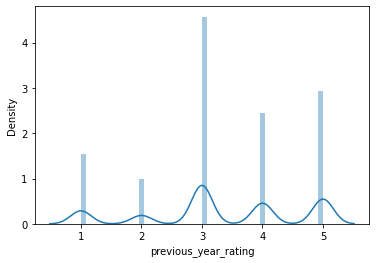

In [13]:
sns.distplot(df_test['previous_year_rating'])
plt.show()

In [14]:
corr = df_train.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


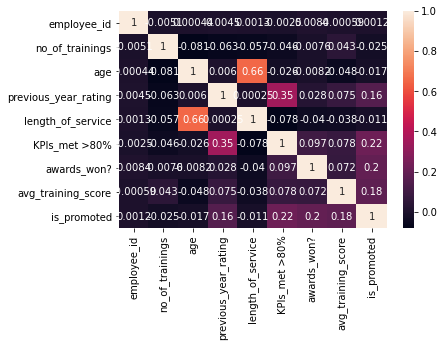

In [15]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

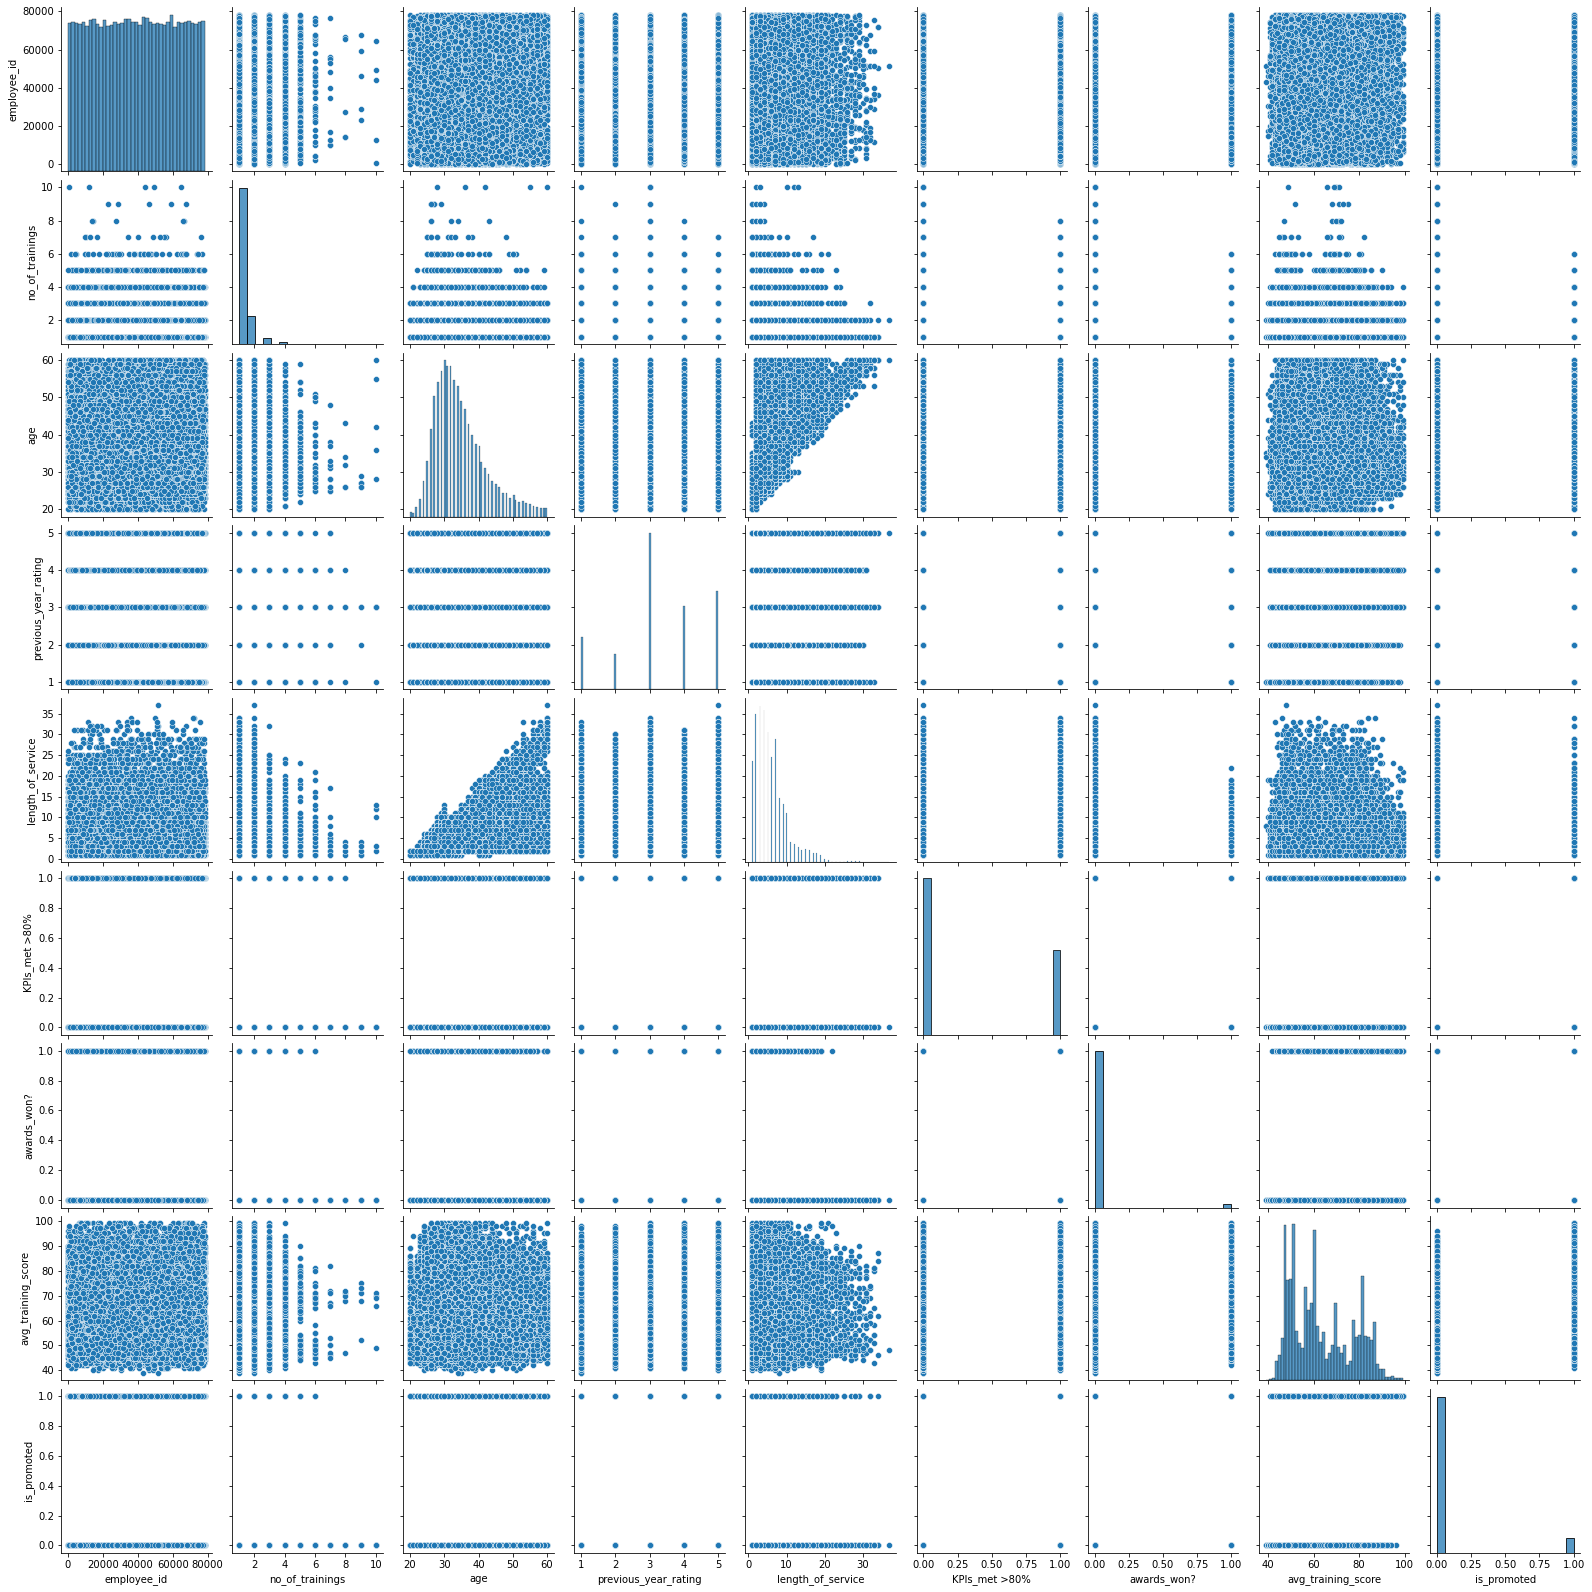

In [16]:
sns.pairplot(df_train)
plt.show()

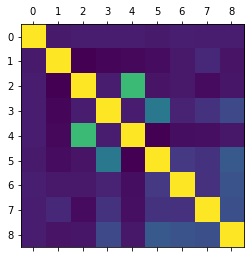

In [17]:
plt.matshow(df_train.corr())
plt.show()

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_test.duplicated().sum()

0

In [20]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
df_train.shape

(54808, 14)

In [22]:
4124/54808*100


7.524448985549554

<AxesSubplot:>

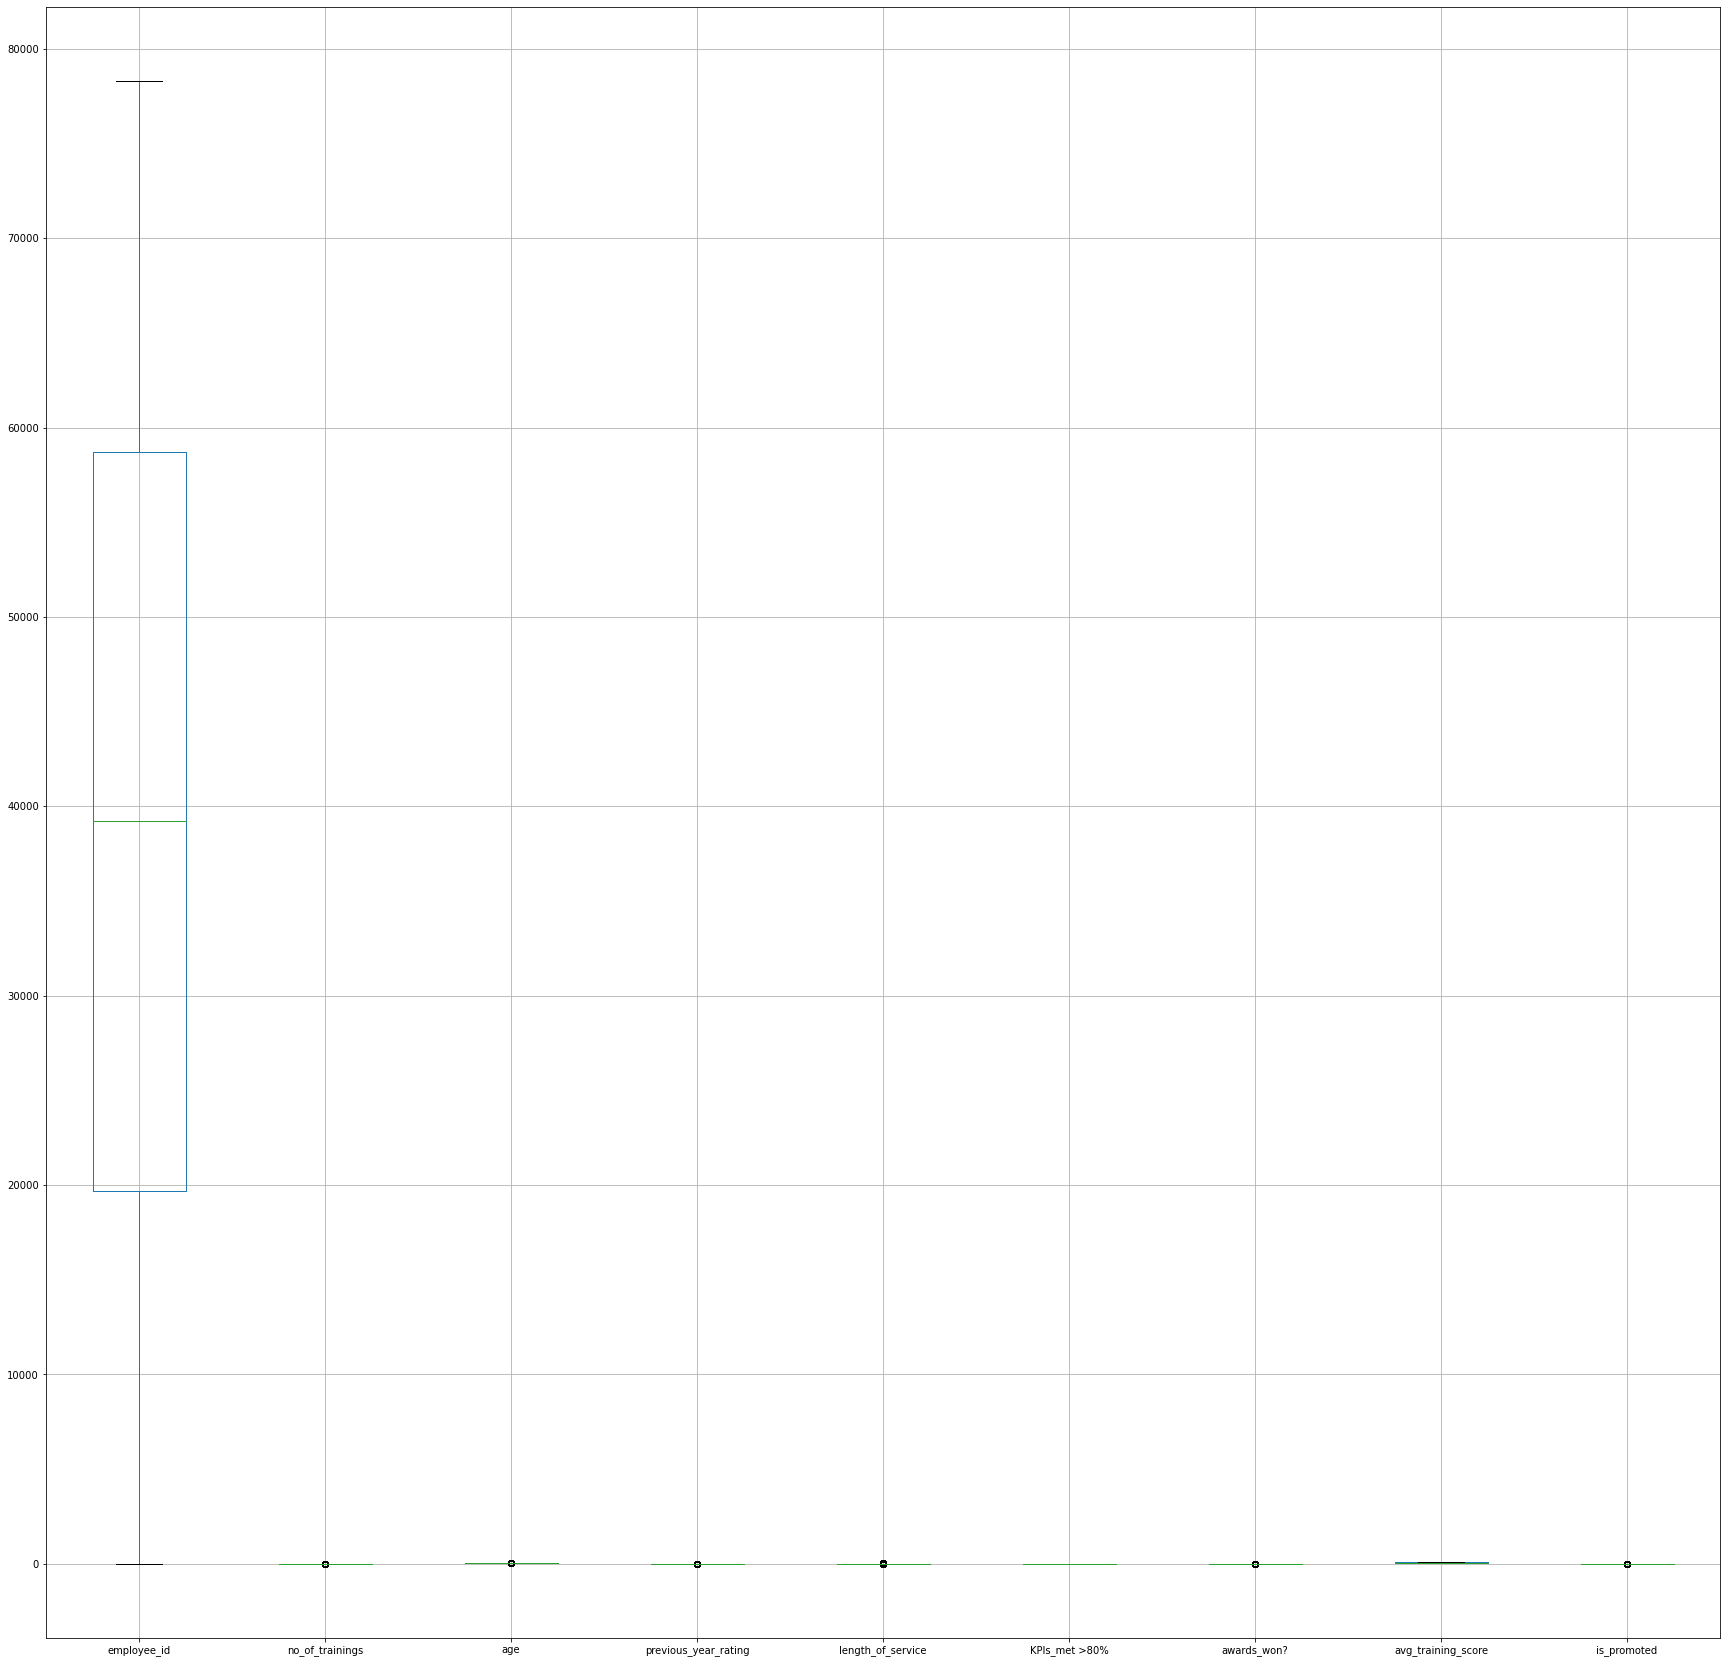

In [23]:
df_train.boxplot(figsize=[30,30])

In [24]:
df_train=df_train.dropna()

In [25]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [26]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [27]:
df_test.shape

(23490, 13)

In [28]:
1812/23490*100

7.713920817369094

In [29]:
df_test=df_test.dropna()

In [30]:
df_test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [31]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [32]:
df_train=df_train.drop(['employee_id'], axis = 1)

In [33]:
df_train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  object 
 1   region                48660 non-null  object 
 2   education             48660 non-null  object 
 3   gender                48660 non-null  object 
 4   recruitment_channel   48660 non-null  object 
 5   no_of_trainings       48660 non-null  int64  
 6   age                   48660 non-null  int64  
 7   previous_year_rating  48660 non-null  float64
 8   length_of_service     48660 non-null  int64  
 9   KPIs_met >80%         48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [35]:
df_train_cat = df_train[['department','region','education','gender','recruitment_channel']]

In [36]:
df_train_target = df_train['is_promoted']  

In [37]:
df_train_num = df_train[['no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?','avg_training_score',
                        'previous_year_rating']]

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
df_train_cat_new = pd.get_dummies(df_train_cat)
df_train_cat_new

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
54803,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
54804,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
54805,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [40]:
df_train_cat.shape

(48660, 5)

In [41]:
#df_train_cat_new=df_train_cat.apply(LabelEncoder().fit_transform)

In [42]:
#df_train_cat_new

In [43]:
df_train_num_new = sc.fit_transform(df_train_num)

In [44]:
df_train_num_new

array([[-0.41652647, -0.07823179,  0.40155619, ..., -0.15391006,
        -1.10019636,  1.32161684],
       [-0.41652647, -0.74184639, -0.54975648, ..., -0.15391006,
        -0.2714691 ,  1.32161684],
       [-0.41652647, -0.21095471,  0.16372803, ..., -0.15391006,
        -1.02485752, -0.26832272],
       ...,
       [-0.41652647,  0.18721405, -0.07410014, ..., -0.15391006,
        -0.57282447, -1.06329251],
       [-0.41652647, -1.14001516, -0.78758464, ..., -0.15391006,
         1.15996889,  1.32161684],
       [-0.41652647, -1.14001516, -0.31192831, ..., -0.15391006,
        -1.10019636, -1.85826229]])

In [45]:
df_train_cat_new = pd.DataFrame(df_train_cat_new)
df_train_num_new = pd.DataFrame(df_train_num_new)

In [46]:
df_cleaned = pd.concat([df_train_num_new,df_train_cat_new])

In [47]:
df_cleaned.head()

,0,1,2,3,4,5,6,department_Analytics,department_Finance,department_HR,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,-0.416526,-0.078232,0.401556,1.343599,-0.15391,-1.100196,1.321617,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.416526,-0.741846,-0.549756,-0.744270,-0.15391,-0.271469,1.321617,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.416526,-0.210955,0.163728,-0.744270,-0.15391,-1.024858,-0.268323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.236399,0.452660,0.877213,-0.744270,-0.15391,-1.024858,-1.858262,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.416526,1.248997,-1.025413,-0.744270,-0.15391,0.707936,-0.268323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_cleaned.shape

(97320, 58)

In [49]:
df_train_target.shape

(48660,)

In [50]:
df_cleaned_new = df_cleaned.sample(48660)

In [51]:
df_cleaned_new.shape

(48660, 58)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_new,df_train_target,test_size = 0.2,random_state = 35)

NameError: name 'df_cleaned_new' is not defined

In [ ]:
print(len(X_test))
print(len(X_train))
print(len(y_test))
print(len(y_train))

In [ ]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

In [ ]:
print(X_train.isna().sum())
print(X_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [59]:
classifier.score(X_train,y_train)

0.914174886970818

In [60]:
classifier.score(X_test,y_test)

0.9084463625154131

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix , classification_report

In [63]:
cm = confusion_matrix(y_test,y_pred)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8841
           1       0.00      0.00      0.00       891

    accuracy                           0.91      9732
   macro avg       0.45      0.50      0.48      9732
weighted avg       0.83      0.91      0.86      9732



In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
knn.score(X_train,y_train)

0.9140721331689272

In [68]:
knn.score(X_test,y_test)

0.905672009864365

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
dt.score(X_train,y_train)

0.9477496917385944

In [72]:
dt.score(X_test,y_test)

0.8692971639950678

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = gnb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [75]:
nb.score(X_train,y_train)

0.8350030826140568

In [76]:
nb.score(X_test,y_test)

0.8308672420879573

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators = 100)  
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
rf.score(X_train,y_train)

0.947698314837649

In [80]:
rf.score(X_test,y_test)

0.8987875051376901